In [15]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import glob
import seaborn as sns
import time
from scipy.interpolate import make_interp_spline, UnivariateSpline, Akima1DInterpolator, PchipInterpolator
sns.set()

In [16]:
def get_file(path ,col , li=[]):
    all_files = glob.glob(path + "/{}*.csv".format(col))
    for filename in all_files:
        df = pd.read_csv(filename).iloc[:,1:].reset_index(drop=True).astype("float32")
        print(filename)
        li.append(df)
    return li

In [17]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# データのパラメータ
N = 10000            # サンプル数
dt = 0.001          # サンプリング間隔
fc = 50            # カットオフ周波数
t_ori = np.arange(0, N*dt, dt)  # 時間軸
t = np.arange(0,10,0.01)
freq = np.linspace(0, 1.0/dt, N)  # 周波数軸



def lowpath(N ,dt, fc, t, freq, li, li3=[]):
    for i in li:
        f = i.CH1
        # 高速フーリエ変換（周波数信号に変換）
        F = np.fft.fft(f)

        # 正規化 + 交流成分2倍
        F = F/(N/2)
        F[0] = F[0]/2

        # 配列Fをコピー
        F2 = F.copy()

        # ローパスフィル処理（カットオフ周波数を超える帯域の周波数信号を0にする）
        F2[(freq > fc)] = 0

        # 高速逆フーリエ変換（時間信号に戻す）
        f2 = np.fft.ifft(F2)
        
        # 振幅を元のスケールに戻す
        f2 = np.real(f2*N)
#         f2= resample(f2, scale=10)
#         i.CH1= f2
        # 100Hzにダウンサンプリング
        f2 = signal.decimate(i.CH1, 10)
        
        df = pd.DataFrame(columns=["time", "volt"])
        df.time = t
        df.volt = f2
        
        # グラフ表示
        fig = plt.figure(figsize=(10.0, 8.0))

        # 時間信号（元）
        plt.subplot(221)
        plt.plot(t_ori, f, label='f(n)')
        plt.xlabel("Time", fontsize=12)
        plt.ylabel("Signal", fontsize=12)
        plt.grid()
        leg = plt.legend(loc=1, fontsize=15)
        leg.get_frame().set_alpha(1)

        # 周波数信号(元)
        plt.subplot(222)
        plt.plot(freq, np.abs(F), label='|F(k)|')
        plt.xlabel('Frequency', fontsize=12)
        plt.ylabel('Amplitude', fontsize=12)
        plt.grid()
        leg = plt.legend(loc=1, fontsize=15)
        leg.get_frame().set_alpha(1)

        # 時間信号(処理後)
        plt.subplot(223)
        plt.plot(t, f2, label='f2(n)')
        plt.xlabel("Time", fontsize=12)
        plt.ylabel("Signal", fontsize=12)
        plt.grid()
        leg = plt.legend(loc=1, fontsize=15)
        leg.get_frame().set_alpha(1)

        # 周波数信号(処理後)
        plt.subplot(224)
        plt.plot(freq, np.abs(F2), label='|F2(k)|')
        plt.xlabel('Frequency', fontsize=30)
        plt.ylabel('Amplitude', fontsize=12)
        plt.grid()
        leg = plt.legend(loc=1, fontsize=30)
        leg.get_frame().set_alpha(1)
        print(plt.rcParams['font.family'])
        
        plt.show()
        
        li3.append(df)
    return li3

In [18]:
# fileとして保存
def to_file(push_path, col, li3):
    for j in range(len(li3)):
        li3[j].to_csv(push_path+"{}{}.csv".format(col, j+1))

In [5]:
path =  '/Users/ryusei/Desktop/mygit/python_module/lab/create_file/'

push_path = '/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/'

cols = ["dan","denim","gam","isi","kiban","kutusita","magic","sponge" ,"table","yubi"]
col_title = ["cardboard","denim","packing tape","stone","circuit","socks","velcro","sponge" ,"table","finger"]
# cols = ["yubi"]


li = []


In [6]:
def main_(path, push_path, cols):
    for i in range(len(cols)):
        li = get_file(path ,cols[i] , li=[])
        x = np.arange(0,10,0.01)
        li3 = lowpath(N ,dt, fc, t, freq, li,li3=[])
        _check_g(li3,cols[i])
#         to_file(push_path, cols[i], li3)
        print("finish_data_go")
    return li3

def main_2(path, cols, col_title):
    for i in range(len(cols)):
        li = get_file(path ,cols[i] , li=[])
        x = np.arange(0,10,0.01)
        _check_g(li,col_title[i])
#         to_file(push_path, cols[i], li3)
        print("finish_data_go")
    return li

import matplotlib.pyplot as plt

SMALL_SIZE = 20
MEDIUM_SIZE = 10
BIGGER_SIZE = 30
FONT_FAMILY =  'Times New Roman'

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('font', family=FONT_FAMILY)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
def _check_g(li3,title):
    fig = plt.figure(figsize=(8, 5))
    for  i in range(1):
#         plt.plot(li3[i].time,li3[i].volt,label="{}".format(str(i)))
        plt.plot(np.arange(0,8,0.01),li3[i+1].volt.iloc[200:])
        plt.xlim(0,3)
        plt.ylim(2.45,2.65)
        plt.xlabel("Time (s)")
        plt.ylabel("Volt (V)")
        
    plt.title(title)
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 30
    plt.show()

In [7]:
li3 = main(path,push_path, cols)

NameError: name 'main' is not defined

In [7]:
import matplotlib.pyplot as plt

SMALL_SIZE = 15
MEDIUM_SIZE = 10
BIGGER_SIZE = 30
FONT_FAMILY =  'Times New Roman'

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('font', family=FONT_FAMILY)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

def _check_g(li3,title):
    fig = plt.figure(figsize=(8, 5))
    for  i in range(1):
#         plt.plot(li3[i].time,li3[i].volt,label="{}".format(str(i)))
        plt.plot(li3[i].time,li3[i].volt)
        plt.xlim(0,3)
        plt.xlabel("Time (s)")
        plt.ylabel("Volt (V)")
    plt.title(title,fontsize=25)
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 30
    plt.show()

def _check_c(graph,title):
    fig = plt.figure(figsize=(12, 4))
    plt.plot(np.arange(0,8,0.01), graph.iloc[200:,:].volt)
    plt.xlim(0,0.5)
    plt.xlabel("Time (s)", labelpad=10)
    plt.ylabel("Volt (V)", labelpad=10)
    plt.title(title,fontsize=25, pad=20)
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 30
    plt.show()

In [8]:
# col_t =['socks', 'sponge', 'finger', 'table', 'denim', 'cardboard', 'circuit', 'stone', 'magic', 'packing tape']
col_t = ["cardboard","denim","packing tape","stone","circuit","socks","velcro","sponge" ,"table","finger"]

/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/dan4.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/dan2.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/dan3.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/dan1.csv


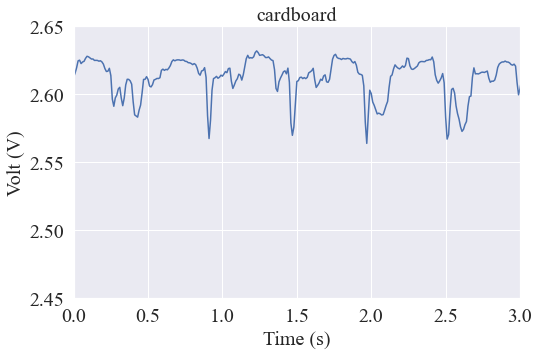

finish_data_go
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/denim4.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/denim1.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/denim3.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/denim2.csv


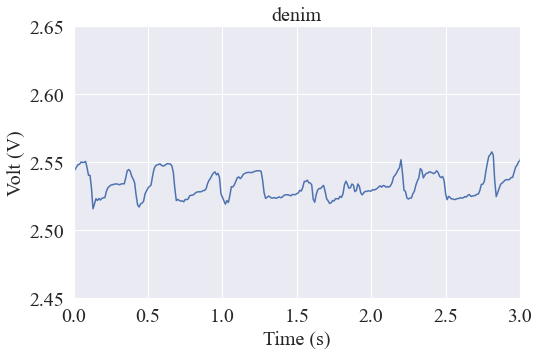

finish_data_go
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/gam4.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/gam1.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/gam3.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/gam2.csv


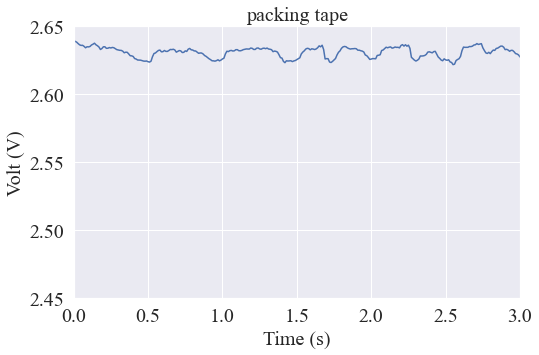

finish_data_go
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/isi2.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/isi3.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/isi1.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/isi4.csv


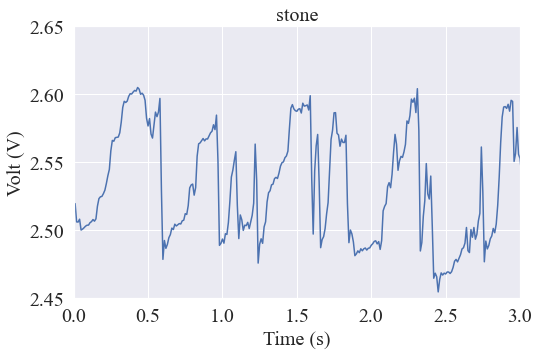

finish_data_go
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/kiban4.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/kiban2.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/kiban3.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/kiban1.csv


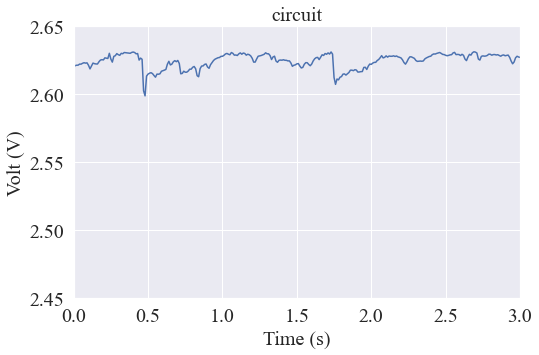

finish_data_go
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/kutusita4.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/kutusita5.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/kutusita1.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/kutusita2.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/kutusita3.csv


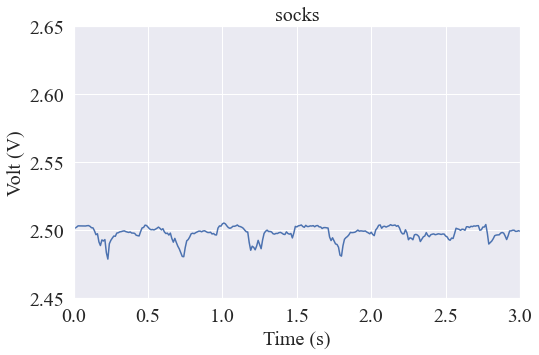

finish_data_go
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/magic4.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/magic1.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/magic3.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/magic2.csv


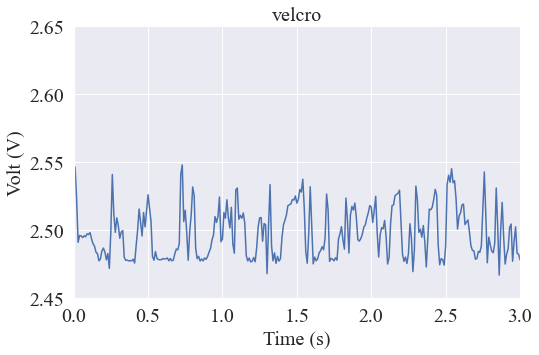

finish_data_go
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/sponge4.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/sponge2.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/sponge3.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/sponge1.csv


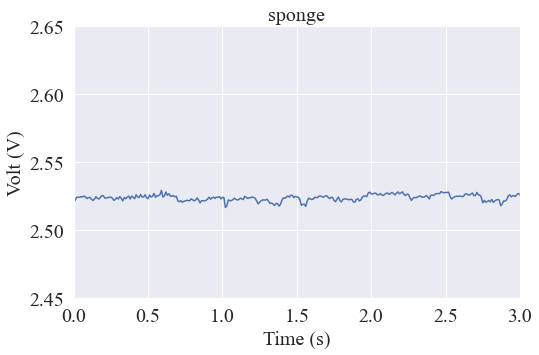

finish_data_go
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/table4.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/table3.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/table2.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/table1.csv


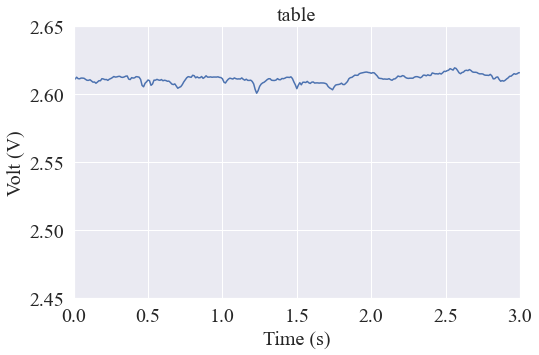

finish_data_go
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/yubi2.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/yubi3.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/yubi1.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/yubi4.csv


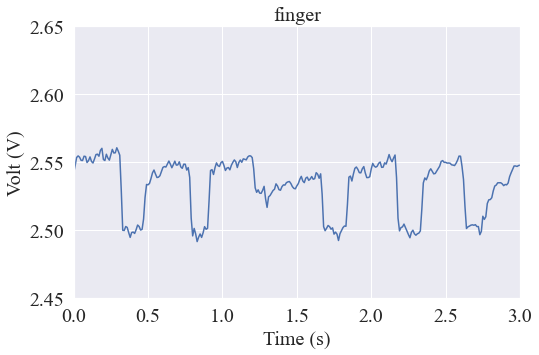

finish_data_go


In [24]:
li3 = main_2(push_path, cols, col_t)

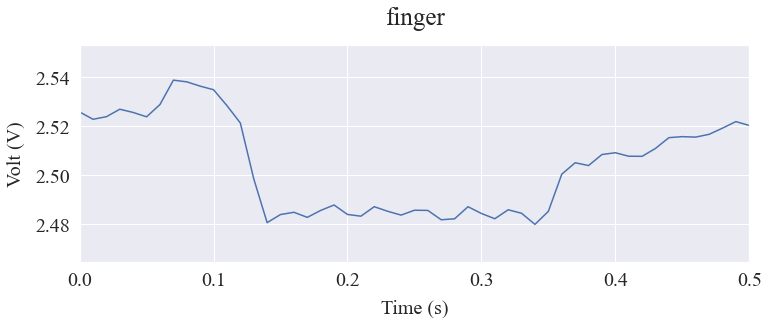

In [146]:
_check_c(li3[0],col_title[9])

In [526]:
len(li3)

4

In [237]:
li3[1].volt = li3[1].volt + 0.02

In [11]:
plt.rcParams["font.size"] = 40
plt.tight_layout()

plt.plot(x, s, "r", label="sin")
plt.plot(x, c, "k", label="cos")
plt.title("Title")
plt.xlabel("xlabel")
plt.ylabel("ylabel")
plt.legend()
plt.tick_params()
print( plt.rcParams['font.size'])

NameError: name 'x' is not defined

<Figure size 432x288 with 0 Axes>

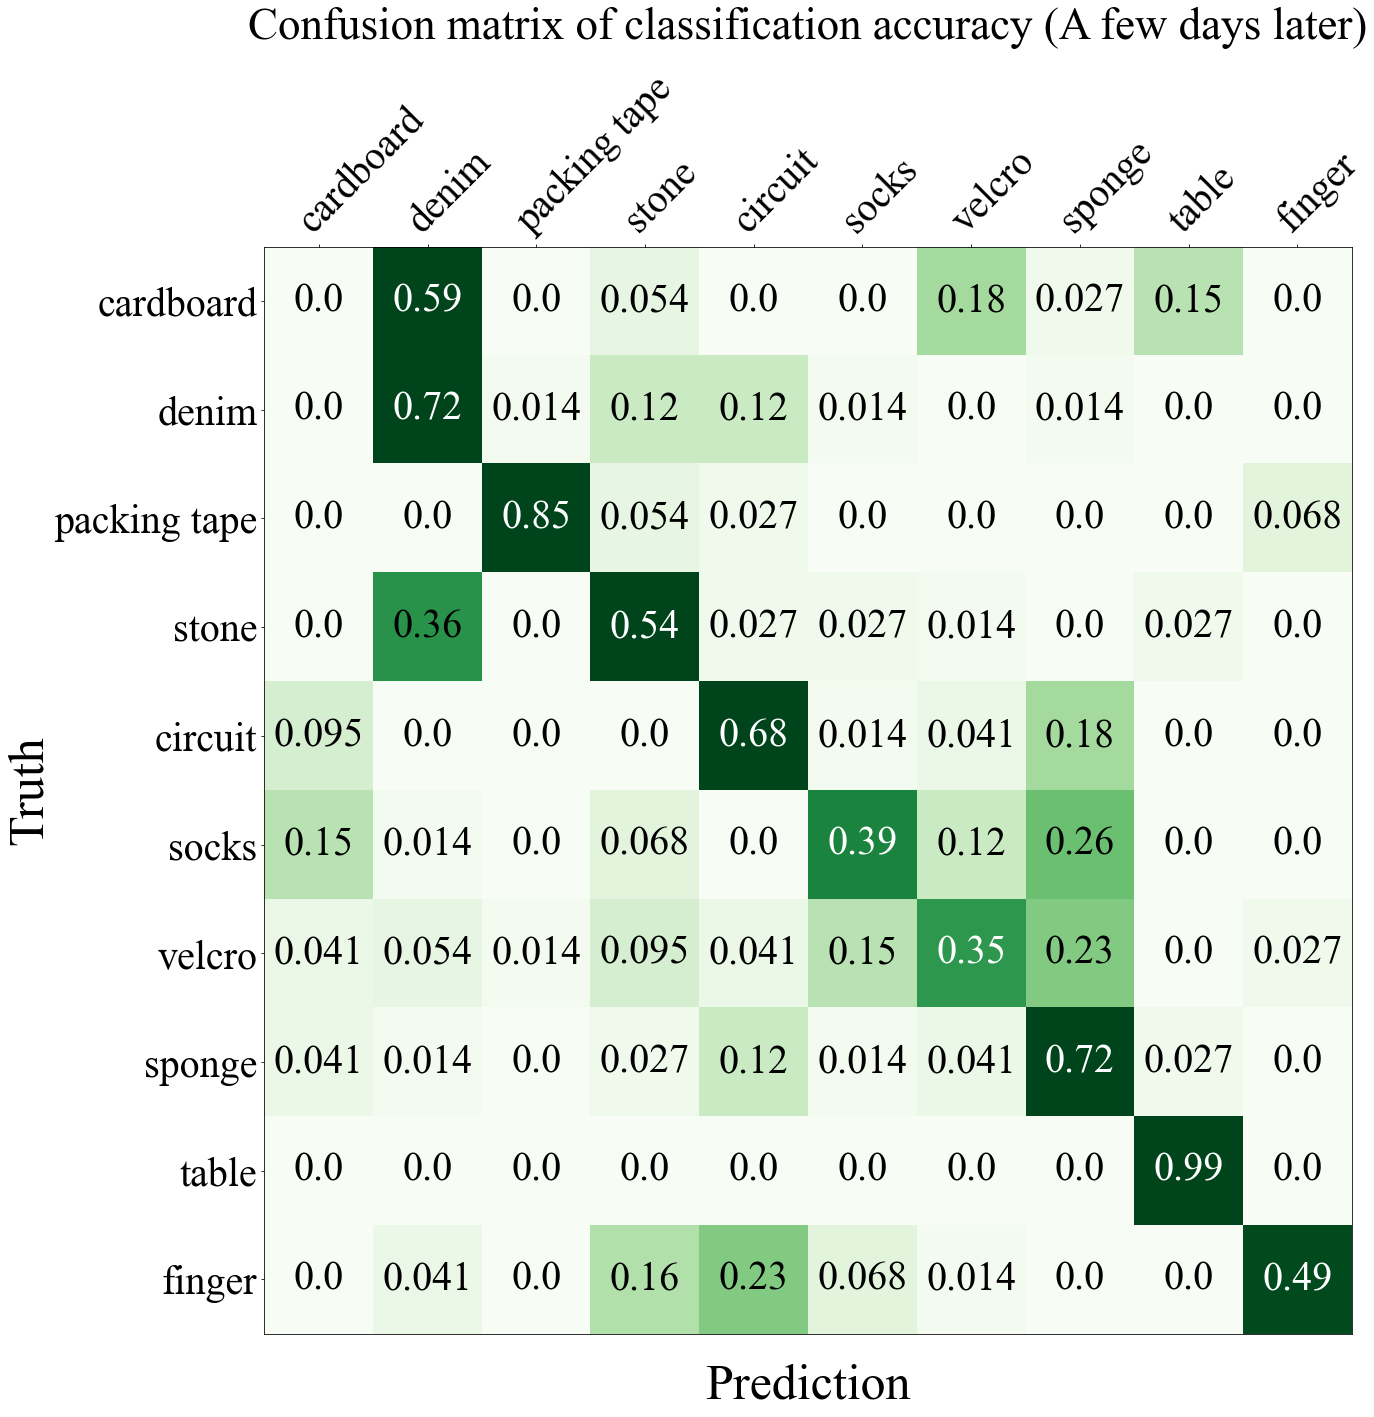

<Figure size 7200x7200 with 0 Axes>

In [20]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

vegetables= col_t

farmers = col_t

harvest = np.array([[0, 0.59, 0, 0.054, 0, 0, 0.18, 0.027,  0.15,  0],
                    [0   ,  0.72, 0.014,  0.12,  0.12, 0.014,    0, 0.014,    0,    0],
                    [0   ,       0,   0.85, 0.054, 0.027,      0,     0,    0,    0, 0.068],
                    [0   ,  0.36,    0,  0.54, 0.027, 0.027, 0.014,    0, 0.027,   0],
                    [0.095,   0,    0,    0,  0.68, 0.014, 0.041,  0.18,    0,    0],
                    [ 0.15, 0.014,    0, 0.068,    0,  0.39,  0.12,  0.26,   0,   0],
                    [0.041, 0.054, 0.014, 0.095, 0.041,  0.15,  0.35,  0.23,    0, 0.027],
                    [0.041, 0.014,    0, 0.027,  0.12, 0.014,0.041,  0.72, 0.027,   0],
                    [0   ,    0,   0,   0,   0,   0,   0,   0,   0.99,   0],
                    [0   , 0.041,   0,  0.16,  0.23, 0.068, 0.014,   0,   0,  0.49]
                   ])
# %matplotlib inline
fig, ax = plt.subplots(figsize=(20, 20))
fig = plt.figure(figsize=(100, 100))

# vminはデータの最小値を定義　vmaxはデータの最大値を定義
im = ax.imshow(harvest,cmap="Greens",vmin=-0, vmax=0.5)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers, fontsize=40)
ax.set_yticklabels(vegetables,  fontsize=40)
ax.xaxis.tick_top()

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="left",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        if i != j and i!=0:
            text = ax.text(j, i, harvest[i, j],
                           ha="center", va="center", color="black")
        elif  i==j and i!=0:
            text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")
        elif i==0 and j ==1:
            text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")
        elif i==0 and j !=1:
            text = ax.text(j, i, harvest[i, j],
                           ha="center", va="center", color="black")
            
            

ax.set_title("Confusion matrix of classification accuracy (A few days later)",  pad=30,fontsize=45)
ax.set_xlabel('Prediction', labelpad=30, fontsize=50)
ax.set_ylabel('Truth', labelpad=1, fontsize=50)
fig.tight_layout()
plt.show()

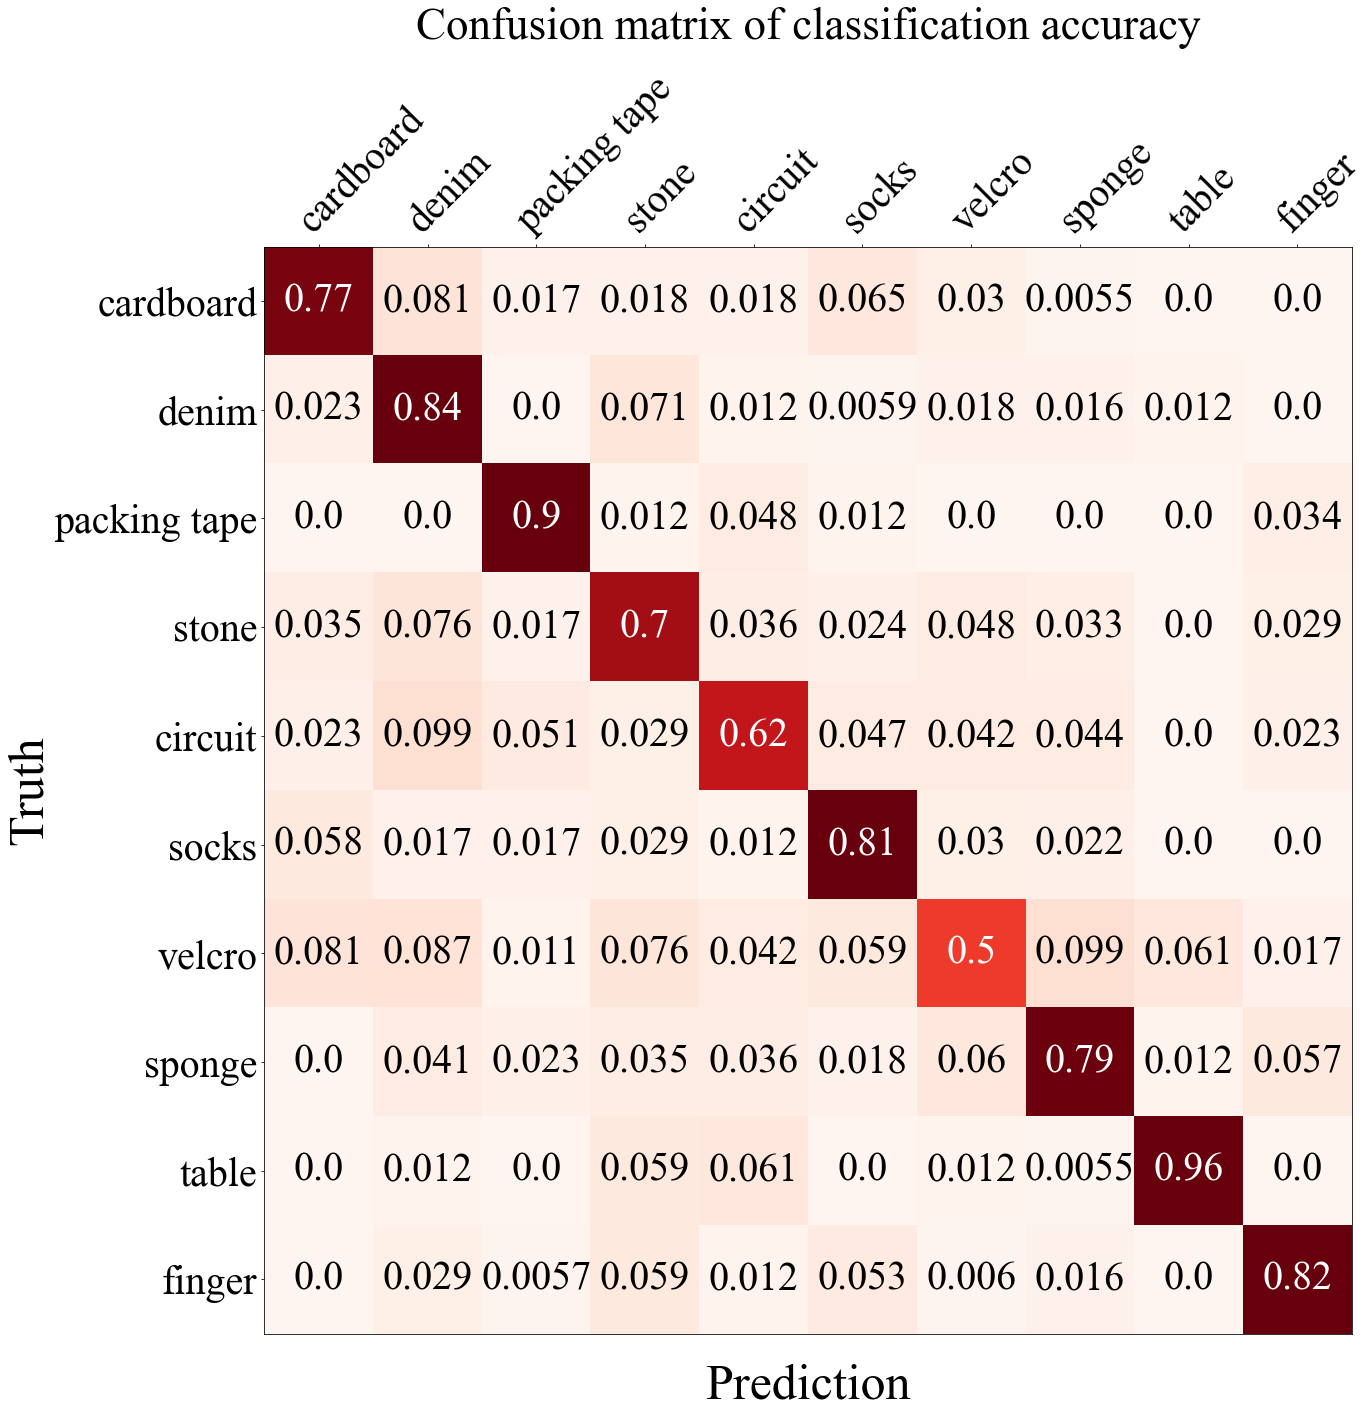

<Figure size 7200x7200 with 0 Axes>

In [25]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

vegetables= col_t

farmers = col_t
harvest = np.array([[0.77, 0.081, 0.017, 0.018, 0.018, 0.065, 0.03, 0.0055  , 0  , 0  ],
       [0.023, 0.84, 0  , 0.071, 0.012, 0.0059, 0.018, 0.016, 0.012, 0  ],
       [0.  , 0.  , 0.9 , 0.012, 0.048, 0.012, 0.  , 0.  ,0.  , 0.034],
       [0.035, 0.076, 0.017, 0.7 , 0.036, 0.024, 0.048, 0.033, 0.  , 0.029],
       [0.023, 0.099 , 0.051, 0.029, 0.62, 0.047, 0.042, 0.044, 0.  , 0.023],
       [0.058, 0.017, 0.017, 0.029, 0.012, 0.81, 0.03, 0.022, 0.  , 0.  ],
       [0.081, 0.087, 0.011, 0.076, 0.042, 0.059, 0.5 , 0.099 , 0.061, 0.017],
       [0.  , 0.041, 0.023, 0.035, 0.036, 0.018, 0.06, 0.79, 0.012, 0.057],
       [0.  , 0.012, 0.  , 0.059, 0.061, 0.  , 0.012, 0.0055  , 0.96, 0.  ],
       [0.  , 0.029, 0.0057, 0.059, 0.012, 0.053, 0.006, 0.016, 0.  , 0.82]],)

# %matplotlib inline
fig, ax = plt.subplots(figsize=(20, 20))
fig = plt.figure(figsize=(100, 100))

# vminはデータの最小値を定義　vmaxはデータの最大値を定義
im = ax.imshow(harvest,cmap="Reds",vmin=-0, vmax=0.8)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers, fontsize=40)
ax.set_yticklabels(vegetables,  fontsize=40)
ax.xaxis.tick_top()

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="left",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        if i != j :
            text = ax.text(j, i, harvest[i, j],
                           ha="center", va="center", color="black")
        elif  i==j :
            text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

            
            

ax.set_title("Confusion matrix of classification accuracy",  pad=30,fontsize=45)
ax.set_xlabel('Prediction', labelpad=30, fontsize=50)
ax.set_ylabel('Truth', labelpad=1, fontsize=50)
fig.tight_layout()
plt.show()

In [38]:
import matplotlib.pyplot as plt

SMALL_SIZE = 13
MEDIUM_SIZE = 10
BIGGER_SIZE = 30
FONT_FAMILY =  'Times New Roman'

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('font', family=FONT_FAMILY)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [39]:
data1  = np.array([-2.373388  , -2.2533357 , -2.3390656 , -2.405486  , -2.5225813 ,
       -2.319554  , -0.8433411 ,  0.4016891 ,  0.5441848 ,  0.51208663,
        0.5098751 ,  0.88016677,  1.0683581 ,  0.83778197,  0.87194   ,
        1.119374  ,  0.7038922 , -0.12066451, -0.04538543,  0.4410536 ,
        0.6095817 ,  0.64816266,  0.66365576,  0.70122576,  0.71938527,
        0.7163397 ,  0.70626795,  0.72807956,  0.7057878 ,  0.6894859 ,
        0.70448613,  0.5614976 ,  0.48285708,  0.50776476,  0.4947612 ,
        0.521337  ,  0.48151752,  0.48519492,  0.47372046,  0.43071648,
        0.50573015,  0.47642478,  0.50790375,  0.50821966,  0.450999  ,
        0.48676193,  0.5293236 ,  0.64787203,  0.0276316 , -0.8276332 ])

data2 = np.array([-0.8612755 , -0.2352718 ,  0.464911  ,  0.43033943,  0.664412  ,
        0.35151306, -0.36561826, -0.32260388, -0.10036952, -0.19691612,
       -0.04365341, -0.10366205,  0.06404547, -0.02975162, -0.8994483 ,
       -0.84076005, -0.67769974, -0.86341906, -1.0846531 , -1.4840952 ,
       -1.396889  , -1.4103163 , -1.4334497 , -1.4039484 , -1.4142376 ,
       -1.4244696 , -1.488331  , -1.3544862 , -1.53697   , -0.36567542,
        1.3325498 ,  1.3161671 ,  1.3009278 ,  1.3397121 ,  1.3137378 ,
        1.3200198 ,  1.2904042 ,  1.3470346 ,  1.2560899 ,  1.4560082 ,
        0.42441747, -0.6269742 , -0.22882965, -0.18351734, -0.13404365,
        0.00207046,  0.00200758,  0.04003745,  0.02420929,  0.02264877])


data3 = np.array([ 1.0352616e+00,  9.1619503e-01,  8.3783250e-01,  1.0074347e+00,
        6.7835265e-01,  5.0593175e-02,  1.9375862e-01,  7.7865314e-01,
        9.7943100e-01,  9.3111944e-01,  8.8417270e-01,  7.8310140e-01,
        7.1383756e-01,  7.1828580e-01,  6.9839510e-01,  6.6780070e-01,
        6.5329330e-01,  6.4683580e-01,  6.5571964e-01,  6.6973420e-01,
        6.3638490e-01,  7.2810480e-01,  5.6044870e-01,  1.1727903e-01,
        1.5066619e-01,  3.4908095e-01,  6.4015080e-01,  4.9932320e-01,
        4.6195470e-02,  3.0833903e-01, -2.7810985e-01, -1.0216630e+00,
       -8.1235490e-01, -6.7491410e-01, -4.6062150e-04, -7.0486397e-01,
       -2.7422010e+00, -3.2323806e+00, -2.9480590e+00, -1.7353293e+00,
       -3.7250882e-01, -1.2988958e-01,  2.5029692e-01,  3.9737988e-01,
        3.9989465e-01,  5.0119346e-01,  1.1122587e-01, -5.0136972e-02,
        9.6364670e-02,  1.4697616e-01])

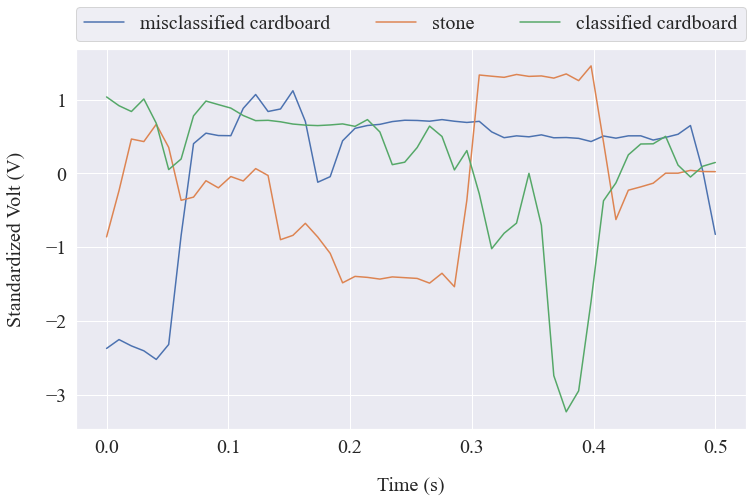

['Times New Roman']


In [42]:
# 靴下をスポンジと誤った曲線 12
fig = plt.figure(figsize=(12, 7))
plt.plot(np.linspace(0,0.5,50),data1 ,label="misclassified cardboard")
plt.plot(np.linspace(0,0.5,50),data2, label="stone")
plt.plot(np.linspace(0,0.5,50),data3 ,label="classified cardboard")
plt.xlabel("Time (s)", labelpad=20)
plt.ylabel("Standardized Volt (V)", labelpad=20)
plt.legend(bbox_to_anchor=(0., 1.02, 1, 0.8), loc=3,
       ncol=3, mode="expand", borderaxespad=0.)
plt.show()
print(plt.rcParams["font.family"])

In [10]:
data4=np.array([-0.0653773 ,  0.17750734,  0.19636187,  0.21818611,  0.19845963,
       -0.5593227 , -1.528574  , -1.8225125 , -0.95218426,  0.23523353,
        0.35649893,  0.22434036,  0.28571865,  0.5487973 ,  0.851013  ,
        0.68741345,  0.6550246 ,  0.8475631 ,  1.1065979 ,  1.0873264 ,
        0.5747665 ,  0.3695783 ,  0.40728733,  0.45122647,  0.55528015,
        0.5064884 ,  0.5255325 ,  0.5737682 ,  0.52848953,  0.25513694,
       -0.07040685, -0.11809918, -0.19001679, -0.1421349 , -0.01508172,
        0.08731652,  0.07345364, -0.20783506, -0.21751507, -0.05265176,
       -0.00497206, -0.23310922,  0.28288794,  0.3068352 , -2.221642  ,
       -3.5967705 , -2.5289378 , -1.036385  ,  0.1381934 ,  0.2928965 ])


data5=np.array([-0.9119779 , -0.89896345, -1.5801713 , -1.653237  , -0.7268365 ,
       -0.6522845 , -0.9841186 , -0.3655053 , -0.56468505, -0.64042616,
       -0.18911728, -0.65205324, -0.36055058,  0.1630642 , -0.08041073,
       -0.11291368,  0.43623444,  0.6836071 , -0.13487962,  0.2197462 ,
        0.52687275,  0.04269755,  0.5703422 , -0.08275596, -0.44091612,
       -0.25124946, -0.47166842, -0.05131001, -0.6487171 , -1.0430137 ,
       -1.2313921 , -0.75458294, -0.12011455, -0.40190598,  0.34037712,
        0.14572269,  0.27916983,  0.80479956,  0.14433536,  0.53380936,
        0.9209382 ,  0.6295346 ,  0.6714515 ,  1.1891867 ,  0.52641034,
       -0.21332934,  0.5851403 ,  0.6786854 ,  1.043683  ,  1.022675  ])


data6=np.array([ 1.0352616e+00,  9.1619503e-01,  8.3783250e-01,  1.0074347e+00,
        6.7835265e-01,  5.0593175e-02,  1.9375862e-01,  7.7865314e-01,
        9.7943100e-01,  9.3111944e-01,  8.8417270e-01,  7.8310140e-01,
        7.1383756e-01,  7.1828580e-01,  6.9839510e-01,  6.6780070e-01,
        6.5329330e-01,  6.4683580e-01,  6.5571964e-01,  6.6973420e-01,
        6.3638490e-01,  7.2810480e-01,  5.6044870e-01,  1.1727903e-01,
        1.5066619e-01,  3.4908095e-01,  6.4015080e-01,  4.9932320e-01,
        4.6195470e-02,  3.0833903e-01, -2.7810985e-01, -1.0216630e+00,
       -8.1235490e-01, -6.7491410e-01, -4.6062150e-04, -7.0486397e-01,
       -2.7422010e+00, -3.2323806e+00, -2.9480590e+00, -1.7353293e+00,
       -3.7250882e-01, -1.2988958e-01,  2.5029692e-01,  3.9737988e-01,
        3.9989465e-01,  5.0119346e-01,  1.1122587e-01, -5.0136972e-02,
        9.6364670e-02,  1.4697616e-01])

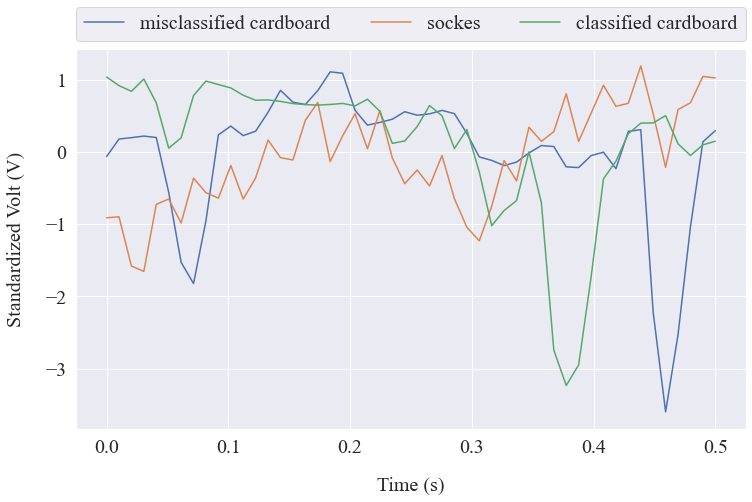

['Times New Roman']


In [43]:
# 靴下をスポンジと誤った曲線 12
fig = plt.figure(figsize=(12, 7))
plt.plot(np.linspace(0,0.5,50),data4 ,label="misclassified cardboard")
plt.plot(np.linspace(0,0.5,50),data5, label="sockes")
plt.plot(np.linspace(0,0.5,50),data6 ,label="classified cardboard")
plt.xlabel("Time (s)", labelpad=20)
plt.ylabel("Standardized Volt (V)", labelpad=20)
plt.legend(bbox_to_anchor=(0., 1.02, 1, 0.8), loc=3,
       ncol=3, mode="expand", borderaxespad=0.)
plt.show()
print(plt.rcParams["font.family"])

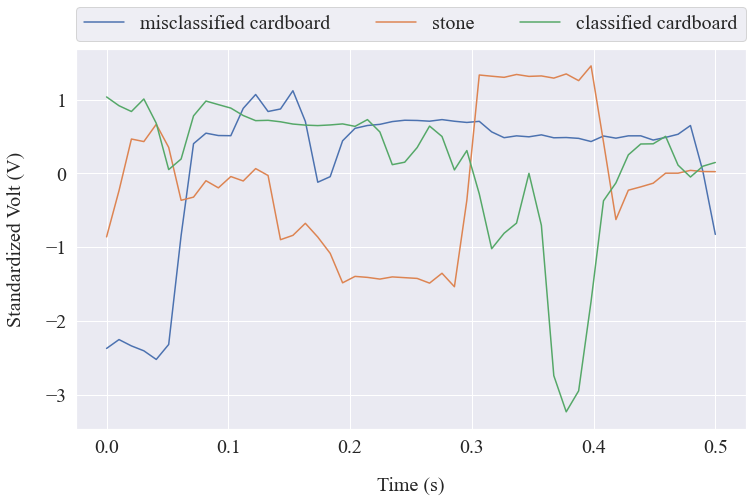

['Times New Roman']


In [44]:
# 靴下をスポンジと誤った曲線 12
fig = plt.figure(figsize=(12, 7))
plt.plot(np.linspace(0,0.5,50),data1 ,label="misclassified cardboard")
plt.plot(np.linspace(0,0.5,50),data2, label="stone")
plt.plot(np.linspace(0,0.5,50),data3 ,label="classified cardboard")
plt.xlabel("Time (s)", labelpad=20)
plt.ylabel("Standardized Volt (V)", labelpad=20)
plt.legend(bbox_to_anchor=(0., 1.02, 1, 0.8), loc=3,
       ncol=3, mode="expand", borderaxespad=0.)
plt.show()
print(plt.rcParams["font.family"])

In [13]:
data7  = np.array([-1.5843995 , -1.2915094 , -1.0480344 , -0.5446019 , -0.8792767 ,
       -0.81697935, -0.10366488, -0.75217164, -1.3402969 , -0.7278274 ,
       -0.5309269 , -0.9107887 , -1.5486263 , -1.6989526 , -1.4580871 ,
       -2.117428  , -2.0664937 , -1.6260852 , -1.8988259 , -1.4056001 ,
       -1.1505642 , -1.6401235 , -1.571385  , -1.3250694 , -1.4200019 ,
       -1.5527222 , -1.5827148 , -1.3208083 , -1.0115347 , -1.2065855 ,
       -1.5542747 , -1.6173317 , -1.3353091 , -1.535711  , -1.7878402 ,
       -1.4835874 , -1.7882366 , -1.915705  , -1.5758773 , -1.528279  ,
       -1.5878347 , -1.111521  , -0.7523038 , -1.3577375 , -1.4591111 ,
       -1.359323  , -0.61393493,  0.6973812 ,  0.3637634 ,  0.37003937])


data8  = np.array([ 0.13361846, -0.0226197 , -0.20692952,  0.01692648,  0.10954242,
       -0.10683463,  0.12173412,  0.306966  ,  0.01211127,  0.15216213,
        0.08628599,  0.01231618,  0.28545123,  0.2571747 ,  0.36802694,
        0.06477123, -0.06134627,  0.19703579, -0.20334372, -0.2538522 ,
       -0.11083024, -0.34759507, -0.693573  , -0.92818636, -0.7656987 ,
       -0.8913039 , -0.9602536 , -0.8376195 , -0.91189665, -0.6461381 ,
       -0.47842535, -0.6227792 , -0.83096015, -1.1032755 , -1.1090128 ,
       -1.1545012 , -1.1710984 , -0.840693  , -0.8499136 , -0.9242932 ,
       -0.8308577 , -0.55219024, -0.2935008 , -0.27321547,  0.11814832,
        0.03516281,  0.00780832,  0.15564549,  0.09099875,  0.5970055 ])

data9 = np.array([-0.70229656, -0.7189936 , -0.63848096, -0.9639155 , -1.5321113 ,
       -1.522771  , -1.4588068 , -1.5067427 , -1.4760697 , -1.464763  ,
       -1.4595671 , -1.4640315 , -1.480174  , -1.4750808 , -1.4535136 ,
       -1.4658434 , -1.4505241 , -1.4965966 , -1.3988496 , -1.465249  ,
       -1.4470943 , -1.3689824 , -1.6572845 , -0.11512303,  1.4995486 ,
        1.1591718 ,  1.1912968 ,  1.2212726 ,  1.0482546 ,  1.1288016 ,
        1.0755266 ,  1.1071029 ,  1.0974768 ,  1.0962821 ,  1.1213534 ,
        1.1209933 ,  1.2232617 ,  1.2696087 ,  1.2452977 ,  1.3093306 ,
        1.2523458 ,  1.2744389 ,  1.3103709 ,  1.2801436 ,  1.4277701 ,
        1.234374  ,  1.4603982 ,  0.8868121 , -1.0179107 , -1.2941403 ])

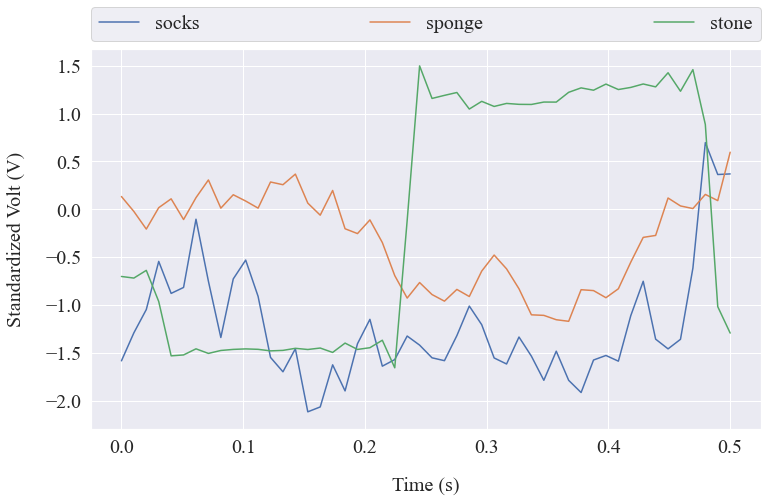

['Times New Roman']


In [45]:
# 靴下をスポンジと誤った曲線 12
fig = plt.figure(figsize=(12, 7))
plt.plot(np.linspace(0,0.5,50),data7 ,label="socks")
plt.plot(np.linspace(0,0.5,50),data8, label="sponge")
plt.plot(np.linspace(0,0.5,50),data9 ,label="stone")
plt.xlabel("Time (s)", labelpad=20)
plt.ylabel("Standardized Volt (V)", labelpad=20)
plt.legend(bbox_to_anchor=(0., 1.02, 1, 0.8), loc=3,
       ncol=3, mode="expand", borderaxespad=0.)
plt.show()
print(plt.rcParams["font.family"])